In [1]:
import cv2
import matplotlib.pyplot as plt 
import numpy as np
img = cv2.imread('/content/drive/MyDrive/input.png')
height, width, channels = np.shape(img)

In [2]:
def initialize_centroids(img, clusters):  # clusters or the number of colors
    # reshaping it or flattening it into a 2d matrix 
    pixels = np.reshape(img, (height * width, channels)) 
    m, n = pixels.shape 

    # centroids 
    centroids = np.zeros((clusters, n)) 

    # random initialization of centroids
    for i in range(clusters): 
        rand1 = int(np.random.random(1)*10) 
        rand2 = int(np.random.random(1)*8) 
        centroids[i, 0] = pixels[rand1, 0] 
        centroids[i, 1] = pixels[rand2, 1]
        centroids[i, 2] = pixels[rand2, 2]
    return pixels, centroids 

In [3]:
# measure the euclidean distance
def distance(x1, y1, x2, y2): 
    dist = np.square(x1 - x2) + np.square(y1 - y2) 
    return np.sqrt(dist)

In [4]:
def k_means(pixels, centroids, clusters): 

    iterations = 10 # the number of iterations 
    m, n = pixels.shape 

    # index values that correspond to the cluster 
    index = np.zeros(m) 

    # k-means algorithm. 
    while(iterations > 0): 
        for j in range(len(pixels)): 
            # initialize minimum value
            minv = 1000
            temp = None
            for k in range(clusters): 
                x1 = pixels[j, 0] 
                y1 = pixels[j, 1] 
                x2 = centroids[k, 0] 
                y2 = centroids[k, 1] 
                if(distance(x1, y1, x2, y2) < minv):
                    minv = distance(x1, y1, x2, y2) 
                    temp = k 
                    index[j] = k 
        for k in range(clusters): 
            sumx = 0
            sumy = 0
            count = 0
            for j in range(len(pixels)): 
                if(index[j] == k): 
                    sumx += pixels[j, 0] 
                    sumy += pixels[j, 1] 
                    count += 1
            if(count == 0): 
                count = 1
                centroids[k, 0] = float(sumx / count) 
                centroids[k, 1] = float(sumy / count)
        iterations -= 1
    return centroids, index 

In [5]:
def recovered_image(means, index, img): 
    # assigning each pixel to its corresponding centroid. 
    centroid = np.array(means) 
    recovered = centroid[index.astype(int), :] 
    # getting back the image
    recovered = np.reshape(recovered, (height, width, channels)) 
    
    plt.imshow(recovered.astype('uint8'))
    plt.show() 
    cv2.imwrite('recovered_image.png',recovered)
    
    return recovered

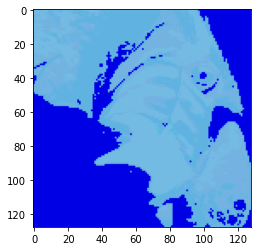

In [12]:
clusters = 16
pixels, centroids = initialize_centroids(img, clusters)
means, index = k_means(pixels, centroids, clusters) 
recovered = recovered_image(means, index, img)